In [29]:
import numpy as np
import pandas as pd

In [30]:
n_points = 2000

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

In [31]:
noise = np.random.randn(n_points) 

g = (100*age) +200*(performance) + 500*age/performance -10000 + 500*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

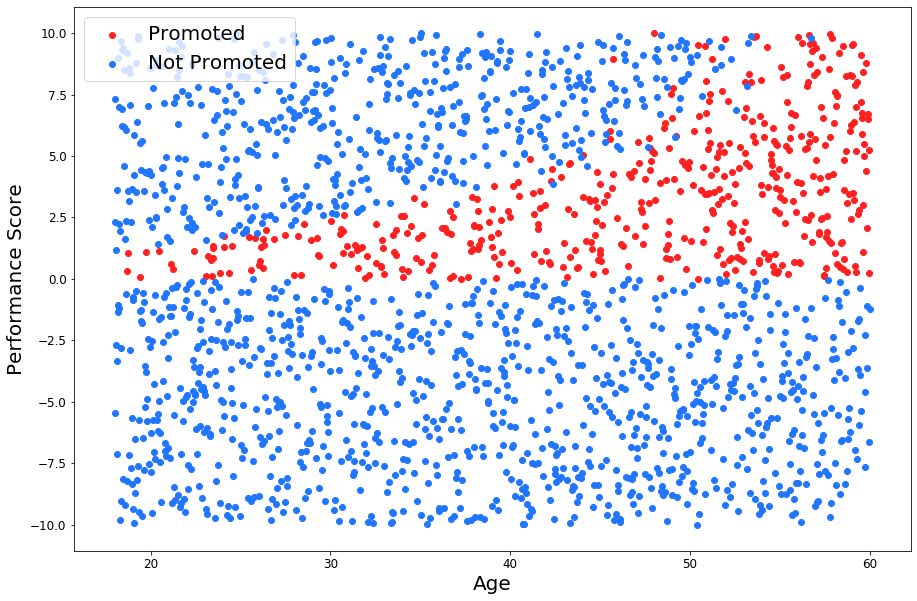

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

# Logistic Regression

In [5]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

In [10]:
x = data[['age','performance']]
x = sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=11)

In [13]:
#fit logistic regression model
model = sm.Logit(y_train,x_train).fit()


Optimization terminated successfully.
         Current function value: 0.417532
         Iterations 7


In [14]:
predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)
accuracy

0.805

In [15]:
n_points = 1000000         #use many point to visualise decision boundry

In [16]:
age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)


In [17]:
performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

In [18]:
data_db = pd.DataFrame({'age':age_db,'performance':performance_db})
data_db = sm.add_constant(data_db)


In [19]:
#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

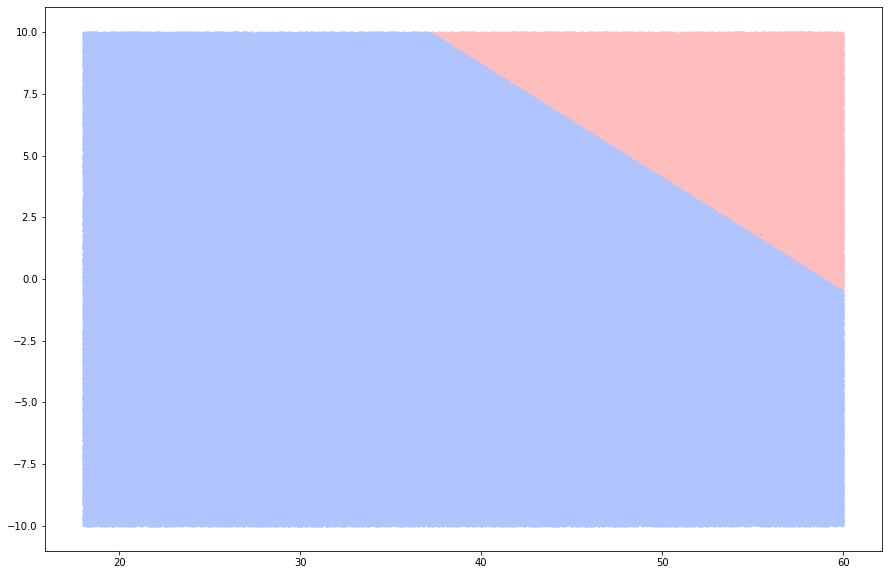

In [20]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text xticklabel objects>)

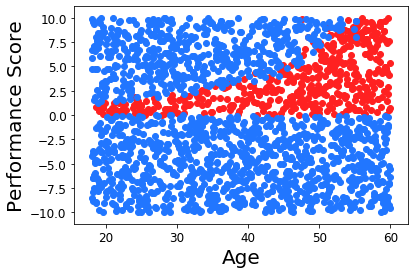

In [21]:
#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

# Logistic Regression with Feature Engineering

In [22]:
data['age_perf_ratio'] = age/performance

x = data[['age','performance','age_perf_ratio']]
x = sm.add_constant(x)
y = data['y']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [26]:
model = sm.Logit(y_train,x_train).fit() #fit new logistic regression model

Optimization terminated successfully.
         Current function value: 0.056073
         Iterations 16


In [28]:
predictions = np.around(model.predict(x_test))
accuracy = metric.accuracy_score(y_test,predictions)
accuracy

0.9883333333333333